# Libraries

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statistics
from numpy import percentile
from numpy import mean
from numpy import std

# Change pd column options
pd.set_option('display.max_columns', None)

# Change plot settings
plt.style.use('ggplot')
sns.set(style = 'whitegrid')

# Dataset

In [2]:
# Read file

treeCensus = pd.read_csv("../ny_street-trees_2015/2015_Street_Tree_Census_-_Tree_Data.csv")
treeCensus.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,"4,073,900",New York,40.723092,-73.844215,"1,027,431.148","202,756.7687",29.0,739,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,"4,097,300",New York,40.794111,-73.818679,"1,034,455.701","228,644.8374",19.0,973,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,"3,044,900",New York,40.717581,-73.936608,"1,001,822.831","200,716.8913",34.0,449,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,"3,044,900",New York,40.713537,-73.934456,"1,002,420.358","199,244.2531",34.0,449,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,"3,016,500",New York,40.666778,-73.975979,"990,913.775","182,202.426",39.0,165,3025654.0,3.010850e+09


In [3]:
# View dataframe's row and col size

treeCensus.shape

(683788, 45)

In [4]:
# View dataframe's col types

pd.DataFrame(treeCensus.dtypes).transpose()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,int64,int64,object,int64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64,object,int64,int64,object,int64,int64,int64,object,object,object,object,float64,float64,object,object,float64,object,float64,float64


In [5]:
# View list of all cols

treeCensus.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [6]:
# Delete unwanted cols and assign as a new dataset

treeSubset = treeCensus[['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'created_at', 
                         'spc_latin', 'steward','sidewalk', 'problems', 'root_stone', 'root_grate', 
                         'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 
                         'brch_other']].copy()
treeSubset.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,08/27/2015,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,09/03/2015,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,09/05/2015,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,09/05/2015,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,08/30/2015,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [7]:
# View rows and cols of subset

treeSubset.shape

(683788, 20)

In [8]:
# View NaNs

pd.DataFrame(treeSubset.isna().sum()).transpose()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,0,0,0,0,0,31616,0,31619,31615,31616,31664,0,0,0,0,0,0,0,0,0


In [9]:
# Curb location has zero NaNs
# What values are here?

pd.DataFrame(treeSubset['curb_loc'].unique())

,0
0,OnCurb
1,OffsetFromCurb


In [10]:
# Status has zero NaNs
# What values are here?

pd.DataFrame(treeSubset['status'].unique())

,0
0,Alive
1,Stump
2,Dead


In [11]:
# What values are in stewardship?

pd.DataFrame(treeSubset['steward'].unique())

,0
0,None
1,1or2
2,3or4
3,NaN
4,4orMore


In [12]:
# What values are in sidewalk?

pd.DataFrame(treeSubset['sidewalk'].unique())

,0
0,NoDamage
1,Damage
2,NaN


In [13]:
# Root stone has zero NaNs
# What values are here?

pd.DataFrame(np.unique(treeSubset[['root_stone',
                                   'root_grate',
                                   'root_other',
                                   'trunk_wire',
                                   'trnk_light',
                                   'trnk_other',
                                   'brch_light',
                                   'brch_shoe',
                                   'brch_other']].values))

,0
0,No
1,Yes


The Data dictionary, states that "Field left blank if the tree is dead or stump. " maybe the NaN values under the `health` column have a `status` of *dead* or *stump* 

In [14]:
# View cols status w/stumps

treeSubset[treeSubset['status'] == 'Stump'].head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,09/09/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,09/04/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,08/27/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,08/27/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,09/08/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [15]:
# View cols status w/dead

treeSubset[treeSubset['status'] == 'Dead'].head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,08/29/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,09/07/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,09/08/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,09/08/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,08/30/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [16]:
# What are the values under the health col including NaNs?

pd.DataFrame(treeSubset['health'].value_counts(dropna = False)).transpose()

,Good,Fair,NaN,Poor
health,528850,96504,31616,26818


In [17]:

# What values are for the problems column?
pd.DataFrame(treeSubset['problems'].unique()).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232
0,None,Stones,MetalGrates,RootOther,"Stones,BranchOther","TrunkLights,BranchLights","RootOther,TrunkOther,BranchOther",BranchOther,"Stones,BranchLights","TrunkOther,BranchLights","MetalGrates,TrunkOther",NaN,TrunkOther,"Stones,WiresRope",BranchLights,"WiresRope,BranchOther","RootOther,BranchOther","Stones,WiresRope,BranchLights",WiresRope,"WiresRope,BranchLights","Stones,TrunkOther","WiresRope,TrunkLights,BranchLights","Stones,RootOther","Stones,BranchLights,BranchOther","Stones,RootOther,BranchLights","MetalGrates,BranchOther","Stones,RootOther,TrunkOther","RootOther,TrunkOther","Stones,TrunkOther,BranchLights,BranchOther","Stones,TrunkOther,BranchOther","RootOther,BranchLights","TrunkOther,BranchOther","RootOther,WiresRope,BranchLights","Stones,TrunkOther,BranchLights","BranchLights,Sneakers","Stones,RootOther,TrunkOther,BranchLights","MetalGrates,TrunkOther,BranchOther","TrunkLights,BranchOther",TrunkLights,"Stones,RootOther,BranchOther","RootOther,WiresRope","BranchLights,BranchOther","Stones,MetalGrates","RootOther,TrunkOther,BranchLights","Stones,WiresRope,TrunkOther,BranchLights","WiresRope,TrunkOther,BranchOther","RootOther,WiresRope,TrunkOther,BranchLights","RootOther,TrunkOther,BranchLights,BranchOther","MetalGrates,RootOther,TrunkOther","Stones,WiresRope,TrunkOther","MetalGrates,RootOther,TrunkOther,BranchOther","Stones,RootOther,WiresRope,BranchLights","WiresRope,TrunkOther","RootOther,WiresRope,TrunkOther","MetalGrates,WiresRope","Stones,RootOther,WiresRope,TrunkOther","Stones,RootOther,TrunkOther,BranchOther","Stones,WiresRope,BranchOther","RootOther,BranchLights,BranchOther","Stones,RootOther,WiresRope,TrunkLights,BranchL...","RootOther,WiresRope,TrunkOther,BranchLights,Br...","WiresRope,TrunkOther,BranchLights,BranchOther","Stones,RootOther,WiresRope,BranchOther","MetalGrates,RootOther","Stones,TrunkLights","Stones,MetalGrates,WiresRope,BranchLights","Stones,WiresRope,BranchLights,BranchOther","TrunkOther,BranchLights,BranchOther","TrunkLights,TrunkOther","Stones,RootOther,TrunkLights,BranchLights","Stones,TrunkLights,BranchLights","WiresRope,BranchLights,BranchOther","WiresRope,TrunkLights","Stones,RootOther,TrunkOther,BranchLights,Branc...","TrunkOther,Sneakers","RootOther,WiresRope,TrunkOther,BranchOther","RootOther,TrunkLights,BranchLights","RootOther,Sneakers","Stones,RootOther,Sneakers,BranchOther","MetalGrates,WiresRope,BranchOther","RootOther,TrunkLights,BranchOther","RootOther,WiresRope,BranchOther","Stones,RootOther,WiresRope,TrunkOther,BranchLi...","MetalGrates,BranchLights","Stones,TrunkLights,BranchLights,BranchOther","Stones,MetalGrates,RootOther","Stones,Sneakers","Stones,TrunkLights,BranchOther","Stones,RootOther,BranchLights,BranchOther",Sneakers,"Stones,RootOther,Sneakers","MetalGrates,TrunkOther,BranchLights","MetalGrates,TrunkLights,BranchLights","WiresRope,TrunkOther,BranchLights,Sneakers","MetalGrates,RootOther,BranchOther","Stones,RootOther,WiresRope","Stones,WiresRope,BranchLights,Sneakers","WiresRope,TrunkOther,BranchLights","Stones,RootOther,WiresRope,TrunkOther,BranchLi...","Stones,RootOther,WiresRope,BranchLights,Branch...","RootOther,WiresRope,BranchLights,BranchOther","Stone

# Clean Up A Bit

So because of the NaNs in the `health` col are the sum of both the stump and dead values in the `status` column... or just about. I'll replace the NaNs with *"Not Applicable"*, instead of leaving non-alive trees out of the dataset.

In [18]:
# Create a mask

maskTreeSubset = ((treeSubset['status'] == 'Stump') | (treeSubset['status'] == 'Dead'))

In [19]:
# Fill specific cols w/NaNs using the mask

treeSubset.loc[maskTreeSubset] =  treeSubset.loc[maskTreeSubset].fillna("Not Applicable")

In [20]:
# Check for other NaNs (if any)

pd.DataFrame(treeSubset.isna().sum()).transpose()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,0,0,0,0,0,1,0,5,0,1,49,0,0,0,0,0,0,0,0,0


#### Remaining NaNs

In [21]:
# View the single NaN under the health col

treeSubset[treeSubset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,09/21/2015,Fraxinus pennsylvanica,None,Damage,None,No,No,No,No,No,No,No,No,No


In [22]:
# View the NaNs under the species name col

treeSubset[treeSubset['spc_latin'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
356613,562532,4,0,OnCurb,Alive,Good,05/19/2016,NaN,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
427541,630814,11,0,OnCurb,Alive,Poor,07/18/2016,NaN,None,Damage,NaN,No,No,No,No,No,No,No,No,No
431417,651014,40,0,OnCurb,Alive,Good,08/02/2016,NaN,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
608632,47941,5,0,OnCurb,Alive,Good,07/03/2015,NaN,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
656960,150745,3,0,OnCurb,Alive,Good,08/16/2015,NaN,1or2,Damage,None,No,No,No,No,No,No,No,No,No


In [23]:
# View common name for species name col w/NaNs

missingSpcLatin = treeCensus[treeCensus['tree_id'].isin([562532,
                                                           630814,
                                                           651014,
                                                           47941,
                                                           150745])]
missingSpcLatin

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
356613,562532,315837,05/19/2016,4,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,157-021 12 AVENUE,11357,Whitestone,407,4,Queens,19,26,11,QN49,Whitestone,"4,099,100",New York,40.791332,-73.803610,"1,038,630.469","227,641.3712",19.0,991,4103675.0,4.045570e+09
427541,630814,323764,07/18/2016,11,0,OnCurb,Alive,Poor,NaN,NaN,None,NaN,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,38-028 CEDAR LANE,11363,Little Neck,411,4,Queens,19,26,11,QN45,Douglas Manor-Douglaston-Little Neck,"4,148,300",New York,40.771945,-73.750414,"1,053,380.635","220,615.7964",19.0,"1,483",4168471.0,4.080630e+09
431417,651014,308540,08/02/2016,40,0,OnCurb,Alive,Good,NaN,NaN,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,81-015 91 AVENUE,11421,Woodhaven,409,4,Queens,32,38,15,QN53,Woodhaven,"4,000,800",New York,40.686902,-73.859411,"1,023,240.372","189,564.7945",32.0,8,4185286.0,4.089630e+09
608632,47941,346795,07/03/2015,5,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,61-032 78 STREET,11379,Middle Village,405,4,Queens,30,30,15,QN21,Middle Village,"4,067,100",New York,40.723484,-73.880296,"1,017,429.853","202,884.0907",30.0,671,4067282.0,4.029350e+09
656960,150745,515014,08/16/2015,3,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,662 EAST 234 STREET,10466,Bronx,212,2,Bronx,11,81,36,BX44,Williamsbridge-Olinville,"2,042,000",New York,40.894521,-73.858255,"1,023,438.408","265,207.8056",11.0,420,2068064.0,2.049940e+09


In [24]:
# View the NaN under the sidewalk col

treeSubset[treeSubset['sidewalk'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
346299,540677,7,0,OffsetFromCurb,Alive,Good,12/29/2015,Gleditsia triacanthos var. inermis,None,NaN,None,No,No,No,No,No,No,No,No,No


In [25]:
# View the NaNs under the problems' col

treeSubset[treeSubset['problems'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
120289,332668,30,0,OffsetFromCurb,Alive,Fair,10/15/2015,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121488,332669,28,0,OffsetFromCurb,Alive,Fair,10/15/2015,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121685,332670,24,0,OffsetFromCurb,Alive,Fair,10/15/2015,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133470,332693,11,0,OffsetFromCurb,Alive,Good,10/15/2015,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133812,332692,15,0,OffsetFromCurb,Alive,Good,10/15/2015,Quercus palustris,None,NoDamage,NaN,No,No,No,No,No,No,No,No,No
134820,332694,28,0,OffsetFromCurb,Alive,Good,10/15/2015,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
144137,332947,3,0,OnCurb,Alive,Good,10/15/2015,Ginkgo biloba,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
145324,332543,9,0,OnCurb,Alive,Good,10/15/2015,Prunus,None,Damage,NaN,No,No,No,No,No,No,No,No,No
145337,332541,8,0,OnCurb,Alive,Good,10/15/2015,Prunus,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
146314,332542,8,0,OnCurb,Alive,Good,10/15/2015,Prunus,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No


The single NaN val under the `health` column will be *"Good"*; `spc_latin` has no instruction mentioned in the data dictionary so I will use *"NotNamed"*; `sidewalk` states in the data dictionary **"Not recorded for dead trees and stumps"** but it has status values of alive so I think I will correct the values with **"NoDamage"**; `problems` column is also not mentioned in the data dictionary so I will use replace with **"None"** values.

In [26]:
# Fill col NaNs

treeSubset['health'].fillna("Good", inplace=True)
treeSubset['spc_latin'].fillna("NotNamed", inplace=True)
treeSubset['sidewalk'].fillna("NoDamage", inplace=True)
treeSubset['problems'].fillna("None", inplace=True)

In [27]:
# View for other NaNs

pd.DataFrame(treeSubset.isna().sum()).transpose()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


I want to change the `tree_id` column into a string because it's technically categorical.

In [28]:
# Change tree id col to a string object

treeSubset['tree_id'] = treeSubset['tree_id'].astype(str)

The `created_at` col is currently a string but that isn't correct, it should be a date object.

In [29]:
# Change string object to a date object

treeSubset['created_at'] = pd.to_datetime(treeSubset['created_at'])
pd.DataFrame(treeSubset.dtypes).transpose()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,object,int64,int64,object,object,object,datetime64[ns],object,object,object,object,object,object,object,object,object,object,object,object,object


From the data dictionary the numerical columns are of a certain measurement. So, I want to place the unit of measure for the `tree_dbh` and `stump_diam` columns.

In [30]:
# Modify col names

treeSubset = treeSubset.rename(columns={'tree_id':'Tree_Id',
                          'tree_dbh':'Tree_Dbh_in',
                          'stump_diam':'Stump_Diam_in',
                          'curb_loc':'Curb_Loc',
                          'status':'Status',
                          'health':'Health',
                          'created_at':'Created_At',
                          'spc_latin':'Spc_Latin',
                          'steward':'Steward',
                          'sidewalk':'Sidewalk',
                          'problems':'Problems',
                          'root_stone':'Root_Stone',
                          'root_grate':'Root_Grate',
                          'root_other':'Root_Other',
                          'trunk_wire':'Trunk_Wire',
                          'trnk_light':'Trnk_Light',
                          'trnk_other':'Trnk_Other',
                          'brch_light':'Brch_Light',
                          'brch_shoe':'Brch_Shoe',
                          'brch_other':'Brch_Other'})

In [31]:
# Check for duplicated Tree Identification

treeSubset.loc[treeSubset.duplicated(subset=['Tree_Id'])]

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other


# Data Wrangling

In [32]:
# Tree diameter counts (top 35)

pd.DataFrame(treeSubset['Tree_Dbh_in'].value_counts()).head(35).transpose()

,4,3,2,5,11,6,7,8,10,9,12,13,14,15,18,0,16,17,19,20,21,22,25,23,24,26,27,28,29,32,30,31,1,33,34
Tree_Dbh_in,60372,54454,41977,41642,37978,36519,30862,30828,29672,28903,25853,24441,21827,19643,19276,17932,17813,15698,12655,11428,10645,10259,10235,9155,8531,6522,6414,5698,5225,4796,4292,3939,2899,2854,2293


In [33]:
# Stump diameter counts (top 35)

pd.DataFrame(treeSubset['Stump_Diam_in'].value_counts()).head(35).transpose()

,0,4,5,3,6,12,10,8,14,15,7,13,20,18,16,9,17,11,22,19,24,25,2,21,30,23,28,26,27,32,36,35,31,29,33
Stump_Diam_in,666134,966,939,779,754,717,716,660,660,648,612,609,572,567,557,530,526,525,426,410,404,398,363,349,338,330,308,273,272,204,184,183,182,168,148


In [34]:
# Curb location counts

pd.DataFrame(treeSubset['Curb_Loc'].value_counts())

,Curb_Loc
OnCurb,656896
OffsetFromCurb,26892


In [35]:
# Status counts

pd.DataFrame(treeSubset['Status'].value_counts())

,Status
Alive,652173
Stump,17654
Dead,13961


In [36]:
# Helath counts

pd.DataFrame(treeSubset['Health'].value_counts())

,Health
Good,528851
Fair,96504
Not Applicable,31615
Poor,26818


In [37]:
# Date counts (top 15)

pd.DataFrame(treeSubset['Created_At'].value_counts()).head(15).transpose()

,2015-10-27,2015-10-13,2015-10-26,2015-10-29,2015-10-15,2015-11-03,2015-10-14,2015-10-30,2015-10-20,2015-10-22,2015-11-02,2015-10-16,2015-10-23,2015-11-04,2015-10-07
Created_At,6852,6676,6258,6223,6085,6028,6010,5834,5677,5368,5322,5151,5069,5065,5027


In [38]:
# Scientific name counts (top 15)

pd.DataFrame(treeSubset['Spc_Latin'].value_counts()).head(15).transpose()

,Platanus x acerifolia,Gleditsia triacanthos var. inermis,Pyrus calleryana,Quercus palustris,Acer platanoides,Not Applicable,Tilia cordata,Prunus,Zelkova serrata,Ginkgo biloba,Styphnolobium japonicum,Acer rubrum,Fraxinus pennsylvanica,Tilia americana,Acer saccharinum
Spc_Latin,87014,64264,58931,53185,34189,31614,29742,29279,29258,21024,19338,17246,16251,13530,12277


In [39]:
# Stewardship counts

pd.DataFrame(treeSubset['Steward'].value_counts())

,Steward
None,487823
1or2,143557
Not Applicable,31615
3or4,19183
4orMore,1610


In [40]:
# Sidewalk counts

pd.DataFrame(treeSubset['Sidewalk'].value_counts())

,Sidewalk
NoDamage,464979
Damage,187194
Not Applicable,31615


In [41]:
# Problems counts top(15)

pd.DataFrame(treeSubset['Problems'].value_counts()).head(15).transpose()

,None,Stones,Not Applicable,BranchLights,"Stones,BranchLights",RootOther,TrunkOther,BranchOther,"Stones,TrunkOther","Stones,RootOther",WiresRope,"Stones,BranchOther","TrunkOther,BranchOther","WiresRope,BranchLights","RootOther,TrunkOther"
Problems,426329,95673,31615,29452,17808,11418,11143,8352,5183,4468,4095,3786,2477,2308,2137


In [42]:
# Root_Stone ... Brch_Othwer counts (top 35)

pd.DataFrame(treeSubset[['Root_Stone',
                        'Root_Grate',
                        'Root_Other',
                        'Trunk_Wire',
                        'Trnk_Light',
                        'Trnk_Other',
                        'Brch_Light',
                        'Brch_Shoe',
                        'Brch_Other']].value_counts()).head(35).transpose()

Root_Stone      No    Yes     No    Yes     No                Yes          No  \
Root_Grate      No     No     No     No     No                 No          No   
Root_Other      No     No     No     No    Yes     No          No   Yes    No   
Trunk_Wire      No     No     No     No     No     No          No    No   Yes   
Trnk_Light      No     No     No     No     No     No          No    No    No   
Trnk_Other      No     No     No     No     No    Yes    No   Yes    No    No   
Brch_Light      No     No    Yes    Yes     No     No    No    No    No    No   
Brch_Shoe       No     No     No     No     No     No    No    No    No    No   
Brch_Other      No     No     No     No     No     No   Yes    No    No    No   
0           457944  95673  29452  17808  11418  11143  8352  5183  4468  4095   

Root_Stone   Yes    No                     Yes    No               Yes    No  \
Root_Grate    No    No               Yes    No    No                No    No   
Root_Other    No    No         Yes    No    No   Yes          No    No   Yes   
Trunk_Wire    No    No   Yes    No    No   Yes    No          No    No    No   
Trnk_Light    No    No    No    No    No    No    No          No    No    No   
Trnk_Other    No   Yes    No   Yes    No    No    No   Yes   Yes   Yes    No   
Brch_Light    No    No   Yes    No    No   Yes   Yes    No   Yes    No    No   
Brch_Shoe     No    No    No    No    No    No    No    No    No    No    No   
Brch_Other   Yes   Yes    No    No    No    No    No   Yes    No   Yes   Yes   
0           3786  2477  2308  2137  2098  1953  1918  1807  1558  1539  1503   

Root_Stone   Yes                    No  Yes        No  Yes        No       \
Root_Grate    No                    No   No        No   No        No        
Root_Other    No   Yes    No  Yes   No  Yes       Yes   No  Yes  Yes   No   
Trunk_Wire   Yes    No    No   No   No   No        No   No   No  Yes  Yes   
Trnk_Light    No    No    No   No   No   No        No   No   No   No   No   
Trnk_Other    No   Yes   Yes   No   No   No  Yes  Yes   No  Yes   No  Yes   
Brch_Light    No    No   Yes  Yes  Yes   No   No  Yes  Yes  Yes  Yes   No   
Brch_Shoe     No    No    No   No   No   No   No   No   No   No   No   No   
Brch_Other    No    No    No   No  Yes  Yes  Yes   No  Yes   No   No   No   
0           1457  1360  1176  901  756  743  617  540  526  495  410  325   

Root_Stone            
Root_Grate            
Root_Other  Yes   No  
Trunk_Wire  Yes  Yes  
Trnk_Light   No   No  
Trnk_Other   No   No  
Brch_Light   No   No  
Brch_Shoe    No   No  
Brch_Other   No  Yes  
0           324  314

#### I'll do a quick stat check on the subset. However, only the tree and stump diameter are the only calculable columns in the subset.

In [43]:
# Get some basic stats on non-string and non-continuos data

diameterDesc = treeSubset[['Tree_Dbh_in', 'Stump_Diam_in']].describe(include = [np.number], datetime_is_numeric = False)
pd.DataFrame(diameterDesc).transpose()

,count,mean,std,min,25%,50%,75%,max
Tree_Dbh_in,683788.0,11.279787,8.723042,0.0,4.0,9.0,16.0,450.0
Stump_Diam_in,683788.0,0.432463,3.290241,0.0,0.0,0.0,0.0,140.0


In [44]:
categorical = treeSubset.dtypes[treeSubset.dtypes == 'object'].index
print(categorical)

treeSubset[categorical].describe()

Index(['Tree_Id', 'Curb_Loc', 'Status', 'Health', 'Spc_Latin', 'Steward',
       'Sidewalk', 'Problems', 'Root_Stone', 'Root_Grate', 'Root_Other',
       'Trunk_Wire', 'Trnk_Light', 'Trnk_Other', 'Brch_Light', 'Brch_Shoe',
       'Brch_Other'],
      dtype='object')


,Tree_Id,Curb_Loc,Status,Health,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
count,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788
unique,683788,2,3,4,134,5,3,233,2,2,2,2,2,2,2,2,2
top,180683,OnCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,None,No,No,No,No,No,No,No,No,No
freq,1,656896,652173,528851,87014,487823,464979,426329,543789,680252,653466,670514,682757,651215,621423,683377,659433


#### Subset Function<br /><br />

Creating a function to use for all my subsets.

In [45]:
def subset(data):
    column1 = input("Enter the first column name: ")
    columns = input("Enter the other column names: ").split(", ")
    columns = [column1] + columns # add the first column to the list of other columns
    subset = (data \
        .groupby(columns[0]) \
        .filter(lambda x: len(x) != 0) \
        .groupby(columns[1:len(columns)]) \
        .size() \
        .to_frame('Count') \
        .reset_index()
    )
    return subset

### Features `Tree Diameter` and `Stump Diameter`

In [46]:
# Stats for plots

# Averrage
treeMean = statistics.mean(treeSubset['Tree_Dbh_in'])
stumpMean = statistics.mean(treeSubset['Stump_Diam_in'])

# Standard Deviation
treeStd = statistics.stdev(treeSubset['Tree_Dbh_in'])
stumpStd = statistics.stdev(treeSubset['Stump_Diam_in'])

# Median
treeMed = statistics.median(treeSubset['Tree_Dbh_in'])
stumpMed = statistics.median(treeSubset['Stump_Diam_in'])

# Mode
treeMode = statistics.mode(treeSubset['Tree_Dbh_in'])
stumpMode = statistics.mode(treeSubset['Stump_Diam_in'])

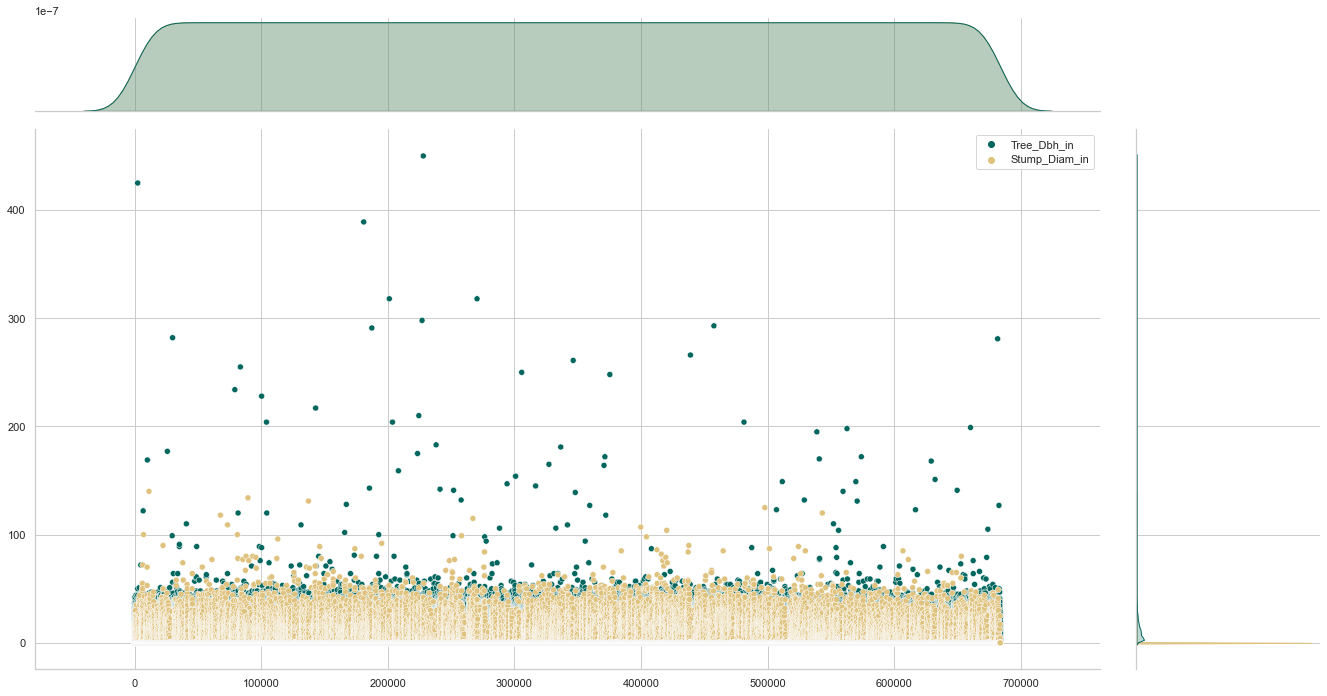

In [47]:
# Vsualize subset

#Plot
sns.jointplot(data = treeSubset,
              palette = ['#01665e',
                         '#dfc27d'])

# Customize
plt.gcf().set_size_inches(20, 10)

# Save fig
# plt.savefig("")

# Plot fig
plt.show()

Let me zoom in on each feature individually.

In [48]:
# Tree Diameter: Execute subset function
# treeSubset cols: Tree_Id / Tree_Dbh_in
treeDiam = subset(treeSubset)
treeDiam.head()

,Tree_Dbh_in,Count
0,0,17932
1,1,2899
2,2,41977
3,3,54454
4,4,60372


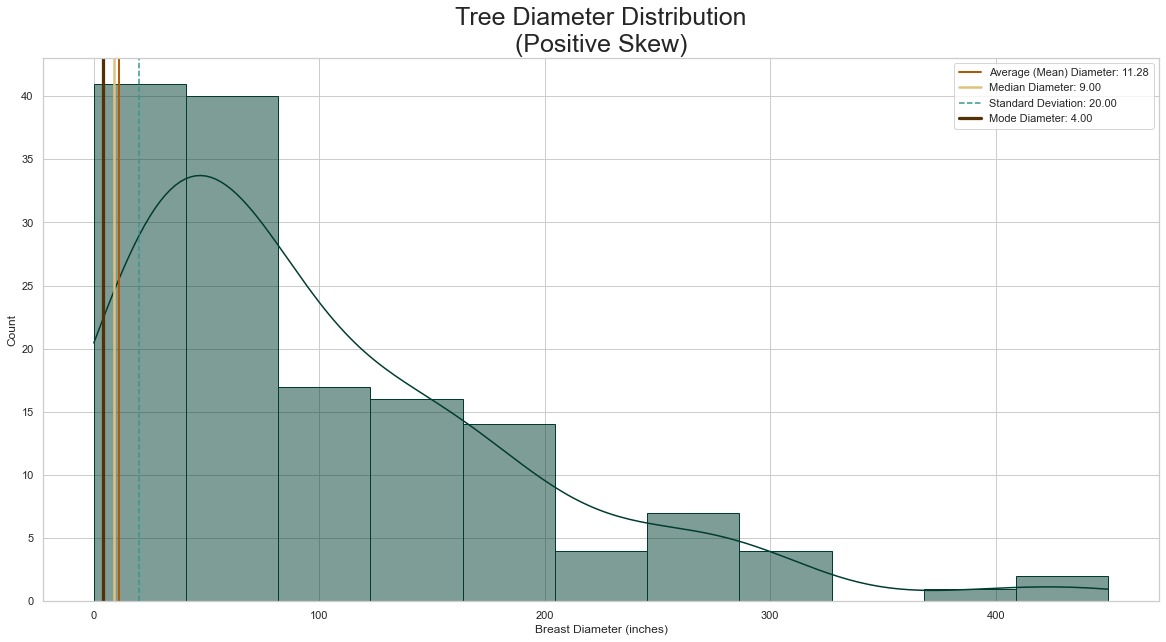

In [49]:
# View tree diameter histogram

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

treeDHist2 = sns.histplot(data = treeDiam,
                            x = 'Tree_Dbh_in',
                            color = '#003c30',
                            edgecolor = '#003c30',
                            kde = True,
                            stat = 'count',
                            ax=ax)

# Stats
plt.axvline(treeMean,
            color = '#b35806',
            lw = 2,
            label = f"Average (Mean) Diameter: {treeMean:.2f}")

plt.axvline(treeMed,
            color = '#dfc27d',
            lw = 2.5,
            label = f"Median Diameter: {treeMed:.2f}")

plt.axvline(treeMean + treeStd,
            color = '#35978f',
            linestyle = 'dashed',
            label = f"Standard Deviation: {treeMean + treeStd:.2f}")


plt.axvline(treeMode,
            color = '#543005',
            lw = 3.25,
            label = f"Mode Diameter: {treeMode:.2f}")

# Customize fig
treeDHist2.set_xlabel('Breast Diameter (inches)')
treeDHist2.set_title('Tree Diameter Distribution\n(Positive Skew)',
                    fontsize = 25)
plt.legend()

# Save fig
# plt.savefig("Tree Diameter Distribution without Binwidth and Filtered")

# Plot fig
plt.show()

In [50]:
# Stump Diameter: Execute subset function
# treeSubset cols: Tree_Id / Stump_Diam_in

stumpDiam = subset(treeSubset)
stumpDiam.head()

,Stump_Diam_in,Count
0,0,666134
1,1,106
2,2,363
3,3,779
4,4,966


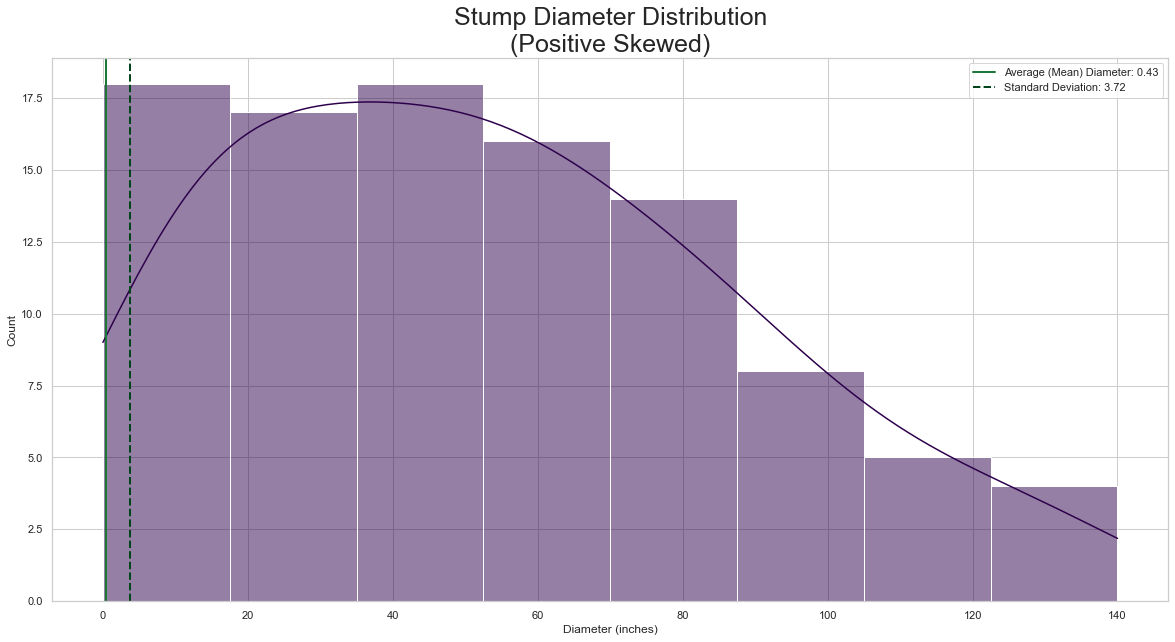

In [51]:
# View stump diameter histogram

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

stumpDHist = sns.histplot(data = stumpDiam,
                            x = 'Stump_Diam_in',
                            color = '#2d004b',
                            kde = True,
                            stat = 'count',
                            ax=ax)

# Stats
plt.axvline(stumpMean,
            color = '#1b7837',
            lw = 2,
            label = f"Average (Mean) Diameter: {stumpMean:.2f}")

# plt.axvline(stumpMed,
#             color = '#5aae61',
#             lw = 1.5,
#             label = f"Median Diameter: {stumpMed:.2f}")

plt.axvline(stumpMean + stumpStd,
            color = '#00441b',
            lw = 2,
            linestyle = 'dashed',
            label = f"Standard Deviation: {stumpMean + stumpStd:.2f}")


# plt.axvline(stumpMode,
#             color = '#00441b',
#             lw = 2,
#             label = f"Mode Diameter: {stumpMode:.2f}")

# Customize fig
stumpDHist.set_xlabel('Diameter (inches)')
stumpDHist.set_title('Stump Diameter Distribution\n(Positive Skewed)',
                    fontsize = 25)
plt.legend()

# Save fig
# plt.savefig("Stump Diameter Distribution without Binwidth and Filtered")

# Plot fig
plt.show()

The tree diameter is right skewed and show a strong possiblity of the data points being outliers and greater than its mode. However, the stump diameter doesn't have a median or a mode. Both are skewed higher diameter ranges.

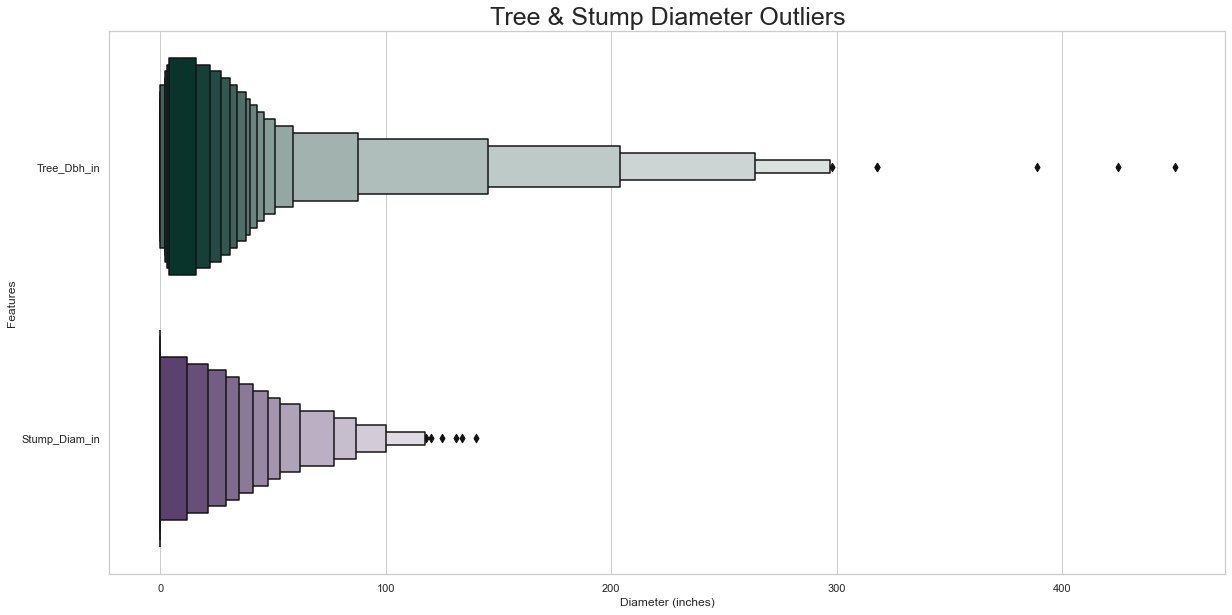

In [52]:
# View outliers of tree and stump diameter

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

treeOutliers = sns.boxenplot(data = treeSubset[["Tree_Dbh_in", "Stump_Diam_in"]],
                             scale = "linear", 
                             palette = ['#003c30', '#2d004b'], 
                             orient = "h", 
                             ax=ax)

# Customize fig
treeOutliers.set_xlabel('Diameter (inches)')
treeOutliers.set_ylabel('Features')
treeOutliers.set_title('Tree & Stump Diameter Outliers',
                        fontsize = 25)

# Save fig
# plt.savefig("Tree & Stump Diameter Outliers")

# Plot fig
plt.show()

#### Qst: What do these outliers belong to, especially in the tree diameter?

In [53]:
# View tree outlier(s)

treeOutly = np.where(treeSubset['Tree_Dbh_in'] == max(treeSubset['Tree_Dbh_in']))
treeSubset.loc[treeOutly]

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
228048,433258,450,0,OffsetFromCurb,Dead,Not Applicable,2015-11-05,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


In [54]:
# View stump outlier(s)

stumpOutly = np.where(treeSubset['Stump_Diam_in'] == max(treeSubset['Stump_Diam_in']))
treeSubset.loc[stumpOutly]

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
11342,206819,0,140,OnCurb,Stump,Not Applicable,2015-09-06,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


The biggest tree has a diameter of 450 inches and the biggest stump has a diameter of 140 inches. Interestingly, both tree types can't be determined by their scientific names.

Stump diameter is mostly made up of zero values so I'll be cautious to when I'll incorporate this feature into to tables and plots. However, I just want to see how many non-zero vals there are for the `Stump Diameter` column.

In [55]:
pd.DataFrame(treeSubset['Stump_Diam_in'][treeSubset.Stump_Diam_in == 0].value_counts())

,Stump_Diam_in
0,666134


# Features `Root_Stone, Root_Grate, Root_Other... Brch_Other`

#### Qst: Which was the greater problem in 2015?

In [56]:
# Subset with tree problems

treeProblemResponses = treeSubset[['Root_Stone',
                                   'Root_Grate',
                                   'Root_Other',
                                   'Trunk_Wire',
                                   'Trnk_Light',
                                   'Trnk_Other',
                                   'Brch_Light',
                                   'Brch_Shoe',
                                   'Brch_Other']]
treeProblemResponses.head()

,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No


In [57]:
# Filter the tree and stump problem (bool responses)

problemDF = treeProblemResponses.apply(pd.Series.value_counts).reset_index()
problemDF

,index,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
0,No,543789,680252,653466,670514,682757,651215,621423,683377,659433
1,Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


In [58]:
# Execute subset function
# treeSubset cols: Tree_Id / Root_Stone, Root_Grate, Root_Other, Trunk_Wire, Trnk_Light, Trnk_Other, Brch_Light, Brch_Shoe, Brch_Other

subsetYN = subset(treeSubset)
subsetYN.head()

,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,Count
0,No,No,No,No,No,No,No,No,No,457944
1,No,No,No,No,No,No,No,No,Yes,8352
2,No,No,No,No,No,No,No,Yes,No,103
3,No,No,No,No,No,No,No,Yes,Yes,13
4,No,No,No,No,No,No,Yes,No,No,29452


In [59]:
# Melt responses

probResponses = subsetYN.melt(id_vars = ['Count'],
                        value_vars = ['Root_Stone',
                                      'Root_Grate',
                                      'Root_Other',
                                      'Trunk_Wire',
                                      'Trnk_Light',
                                      'Trnk_Other',
                                      'Brch_Light',
                                      'Brch_Shoe',
                                      'Brch_Other'],
                        var_name = "Problems",
                        value_name = "Responses")
probResponses.head()

,Count,Problems,Responses
0,457944,Root_Stone,No
1,8352,Root_Stone,No
2,103,Root_Stone,No
3,13,Root_Stone,No
4,29452,Root_Stone,No


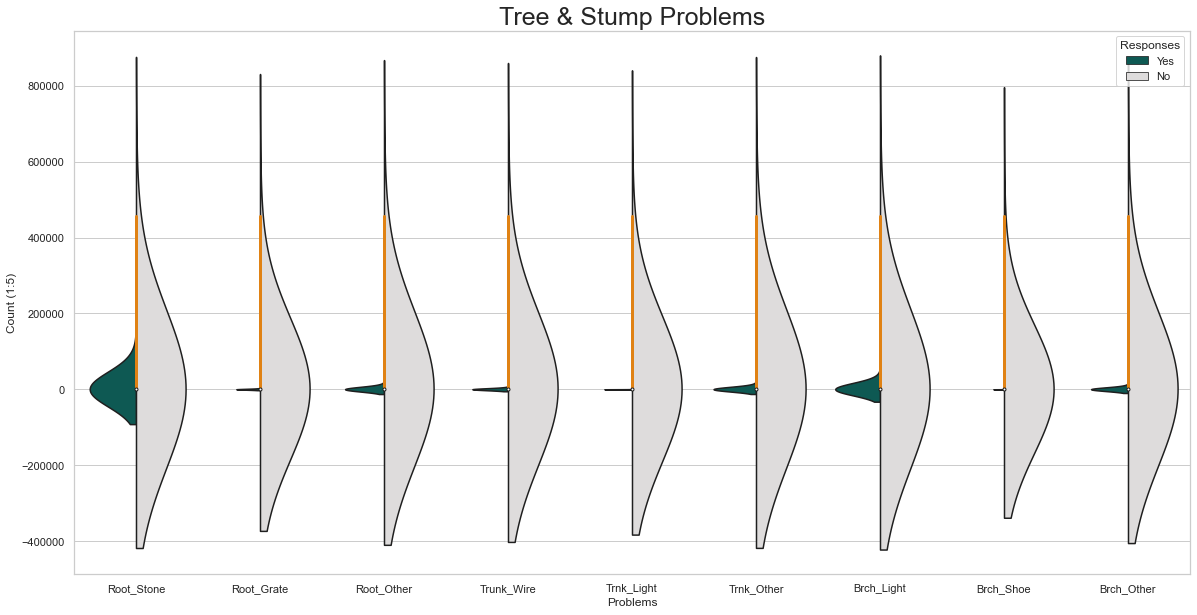

In [60]:
# Visualise responses

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot
probLine = sns.lineplot(data = probResponses,
                          y = 'Count',
                          x = 'Problems',
                          units = 'Problems',
                          estimator = None,
                          color = '#e08214',
                          lw = 3)

probVio = sns.violinplot(data = probResponses,
                          y = 'Count',
                          x = 'Problems',
                          split = True,
                          hue = 'Responses',
                          hue_order = ['Yes',
                                       'No'],
                          palette = ['#01665e',
                                     '#dedcdc'],
                          bw = 5.0, # 'scott' / 'silverman' / 0.5
                          scale = 'count',
                          ax=ax)

# Customise fig
ax.set_xlabel('Problems')
ax.set_ylabel('Count (1:5)')
ax.set_title('Tree & Stump Problems',
                    fontsize = 25)

# Save fig
# plt.savefig("Tree & Stump Problems")

# Plot fig
plt.show()

Original subset had `683788` rows and with the modification there is now `683635` rows.<br /><br />

# Additional Subset: Alive Trees<br />
Now I will separate `Alive` trees from `Stump/Dead` trees because the alive trees are the largest `Status` type.

In [61]:
# Filter Alive frm Dead/Stumps

aliveTreeSubset = treeSubset[treeSubset['Status'] == 'Alive']

In [62]:
# Group alive trees by species name

aliveTreeSubset.groupby('Spc_Latin')['Tree_Dbh_in'].describe().head()

,count,mean,std,min,25%,50%,75%,max
Spc_Latin,,,,,,,,
Acer,7080.0,11.675424,6.577626,0.0,7.0,11.0,15.0,59.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.0,10.0,28.0
Acer campestre,2550.0,7.126275,4.437674,0.0,4.0,6.0,9.0,64.0
Acer ginnala,2049.0,7.869204,4.853365,0.0,4.0,7.0,10.0,40.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.0,3.0,30.0


For the alive tree subset there are minimum vals of 0 (zero), which is wrong, and the max values seem too large. I also noticed that the 25% to 75% ranges look accurate so I will use these two measurables as references.<br /><br />
Firstly, let me check for `Tree_Dbh` vals that are lower than 25%, and if they are; I'll just modify all rows to reflect a 25% value and vice versa for the 75% range.

In [63]:
# Group 25% and 75% tree diameters with its scientific name

aliveStats = aliveTreeSubset.groupby('Spc_Latin')['Tree_Dbh_in'] \
                            .describe() \
                            .reset_index()[['Spc_Latin',
                                            '25%',
                                            '75%']]

aliveStats.head()

,Spc_Latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0


In [64]:
# Merge alive stat table with alive tree subset

aliveTreeSubset = aliveTreeSubset.merge(aliveStats,
                                        on = 'Spc_Latin',
                                        how = 'left')
aliveTreeSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,25%,75%
0,180683,3,0,OnCurb,Alive,Fair,2015-08-27,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21,0,OnCurb,Alive,Fair,2015-09-03,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,3,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21,0,OnCurb,Alive,Good,2015-08-30,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0


In [65]:
# Compare min/max to 25%/75% and modify if conditions are true for tree diameter

stats25Mask = aliveTreeSubset['Tree_Dbh_in'] < aliveTreeSubset['25%']
aliveTreeSubset.loc[stats25Mask, 'Tree_Dbh_in'] = aliveTreeSubset['25%']

stats75Mask = aliveTreeSubset['Tree_Dbh_in'] < aliveTreeSubset['75%']
aliveTreeSubset.loc[stats75Mask, 'Tree_Dbh_in'] = aliveTreeSubset['75%']

In [66]:
# View modified alive tree subsets

aliveTreeSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,25%,75%
0,180683,14.0,0,OnCurb,Alive,Fair,2015-08-27,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,24.0,0,OnCurb,Alive,Fair,2015-09-03,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,13.0,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,13.0,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21.0,0,OnCurb,Alive,Good,2015-08-30,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0


Now, I'll create some tables and plot.

In [67]:
# Filter tree diameter with conditions
# aliveTreeSubset cols: Tree_Id / Tree_Dbh_in, Status, Health

aliveTree = subset(aliveTreeSubset)
aliveTree.head()

,Tree_Dbh_in,Status,Health,Count
0,3.00,Alive,Fair,87
1,3.00,Alive,Good,347
2,3.00,Alive,Poor,35
3,3.25,Alive,Fair,38
4,3.25,Alive,Good,165


In [68]:
# Melt alive tree sub

tree = aliveTree.melt(id_vars = ['Tree_Dbh_in',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
tree.head()

,Tree_Dbh_in,Count,Type,Condition
0,3.00,87,Status,Alive
1,3.00,347,Status,Alive
2,3.00,35,Status,Alive
3,3.25,38,Status,Alive
4,3.25,165,Status,Alive


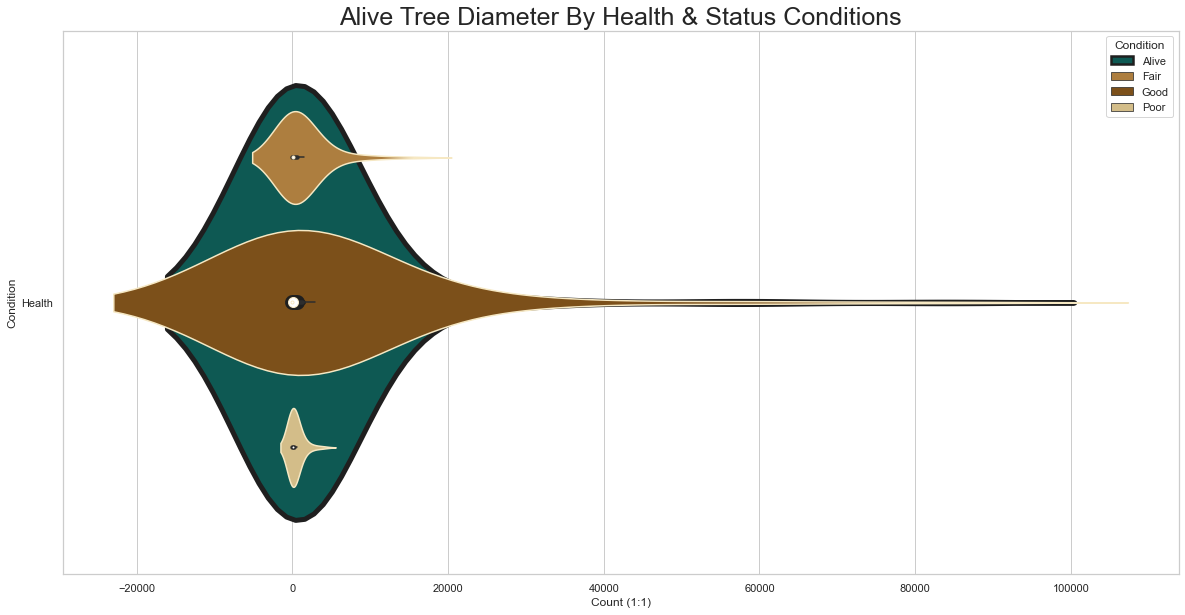

In [69]:
# Visualize alive trees

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot both summaries above
sns.violinplot(data = tree[tree['Condition'] == 'Alive'],
               x = 'Count',
               y = 'Type',
               hue = 'Condition',
               size = 'Count',
               palette = ['#01665e'],
               linewidth = 5,
               bw = 1,
               scale = 'count',
               ax=ax)

sns.violinplot(data = tree[tree['Condition'] != 'Alive'],
               x = 'Count',
               y = 'Type',
               hue = 'Condition',
               size = 'Count',
               palette = ['#bf812d',
                          '#8c510a',
                          '#dfc27d'],
               bw = 1,
               scale = 'count',
               ax=ax)


# Customize fig
plt.setp(ax.collections[1:-1], edgecolor="#f6e8c3")
ax.set_xlabel('Count (1:1)')
ax.set_ylabel('Condition')
ax.legend(title='Condition')
ax.set_title('Alive Tree Diameter By Health & Status Conditions',
            fontsize = 25)

# Save fig      
# plt.savefig("Alive Tree Diameter By Health & Status Conditions")

# Plot fig
plt.show()

# Additional Subset: Stumps

In [70]:
# Filter stumps w/status of stump 

stumpSubset = treeSubset[(treeSubset['Status'] == 'Stump')]

stumpSubset.groupby('Tree_Id')['Stump_Diam_in'].describe().head()

,count,mean,std,min,25%,50%,75%,max
Tree_Id,,,,,,,,
100117,1.0,19.0,NaN,19.0,19.0,19.0,19.0,19.0
100171,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
100172,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
100297,1.0,6.0,NaN,6.0,6.0,6.0,6.0,6.0
100430,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0


In [71]:
# Group 25% and 75% tree diameters

stumpStats = stumpSubset.groupby('Tree_Id')['Stump_Diam_in'] \
                            .describe() \
                            .reset_index()[['Tree_Id',
                                            '25%',
                                            '75%']]
stumpStats.head()

,Tree_Id,25%,75%
0,100117,19.0,19.0
1,100171,5.0,5.0
2,100172,5.0,5.0
3,100297,6.0,6.0
4,100430,3.0,3.0


In [72]:
# Merge alive stump table with alive stump subset

stumpSubset = stumpSubset.merge(stumpStats,
                                        on = 'Tree_Id',
                                        how = 'left')
stumpSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,25%,75%
0,211205,0,16,OnCurb,Stump,Not Applicable,2015-09-09,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,16.0,16.0
1,203597,0,15,OnCurb,Stump,Not Applicable,2015-09-04,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,15.0,15.0
2,179766,0,30,OnCurb,Stump,Not Applicable,2015-08-27,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,30.0,30.0
3,180619,0,10,OnCurb,Stump,Not Applicable,2015-08-27,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,10.0,10.0
4,208828,0,15,OnCurb,Stump,Not Applicable,2015-09-08,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,15.0,15.0


In [73]:
# Compare min/max to 25%/75% and modify if conditions are true for stump diameter

stump25Mask = stumpSubset['Stump_Diam_in'] < stumpSubset['25%']
stumpSubset.loc[stump25Mask, 'Stump_Diam_in'] = stumpSubset['25%']

stump75Mask = stumpSubset['Stump_Diam_in'] < stumpSubset['75%']
stumpSubset.loc[stump75Mask, 'Stump_Diam_in'] = stumpSubset['75%']

In [74]:
# View modified alive stump subsets

stumpSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,25%,75%
0,211205,0,16,OnCurb,Stump,Not Applicable,2015-09-09,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,16.0,16.0
1,203597,0,15,OnCurb,Stump,Not Applicable,2015-09-04,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,15.0,15.0
2,179766,0,30,OnCurb,Stump,Not Applicable,2015-08-27,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,30.0,30.0
3,180619,0,10,OnCurb,Stump,Not Applicable,2015-08-27,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,10.0,10.0
4,208828,0,15,OnCurb,Stump,Not Applicable,2015-09-08,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,15.0,15.0


In [75]:
# Filter stump diameter with conditions
# aliveTreeSubset cols: Tree_Id / Stump_Diam_in, Status, Health

stumpTable = subset(stumpSubset)
stumpTable.head()

,Stump_Diam_in,Status,Health,Count
0,1,Stump,Not Applicable,106
1,2,Stump,Not Applicable,363
2,3,Stump,Not Applicable,779
3,4,Stump,Not Applicable,966
4,5,Stump,Not Applicable,939


In [76]:
# Melt alive stump sub

stump = stumpTable.melt(id_vars = ['Stump_Diam_in',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
stump.head()

,Stump_Diam_in,Count,Type,Condition
0,1,106,Status,Stump
1,2,363,Status,Stump
2,3,779,Status,Stump
3,4,966,Status,Stump
4,5,939,Status,Stump


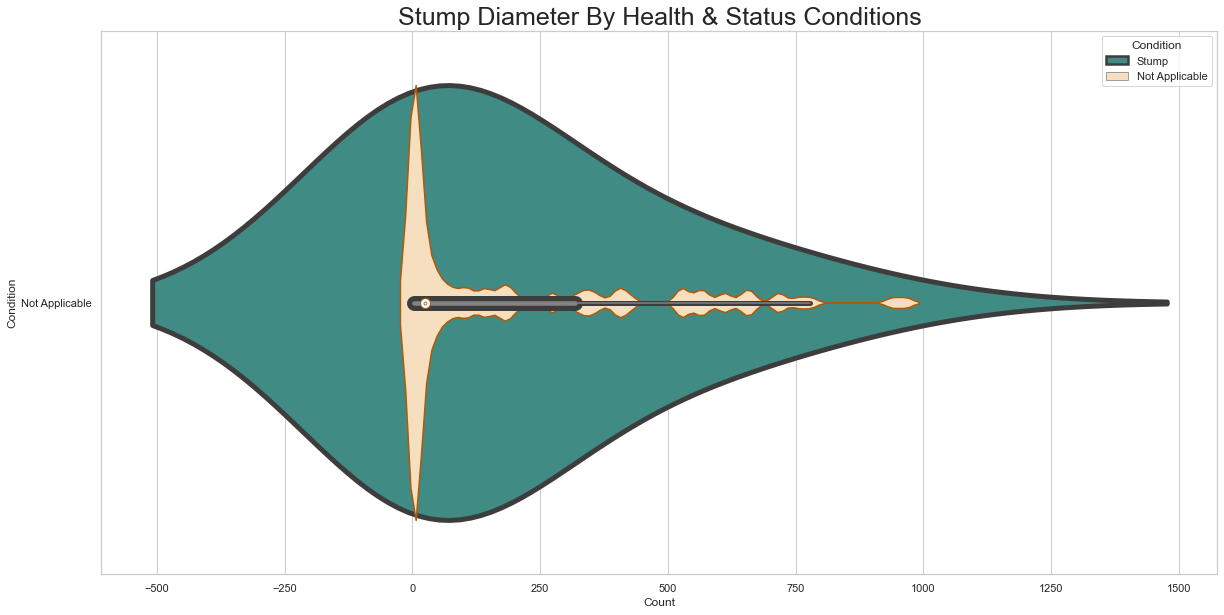

In [77]:
# Visualize alive trees

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot both summaries above
sns.violinplot(data = stump[stump['Condition'] == 'Stump'],
               x = 'Count',
               y = 'Type',
               hue = 'Condition',
               palette = ['#35978f'],
               linewidth = 5,
               bw = 1,
               scale = 'count',
               ax=ax)

sns.violinplot(data = stump[stump['Condition'] != 'Stump'],
               x = 'Count',
               y = 'Condition',
               hue = 'Condition',
               palette = ['#fee0b6'],
               bw = 0.05,
               scale = 'count',
               ax=ax)

# Customize fig
plt.setp(ax.collections[1:-1], edgecolor="#b35806")
ax.set_xlabel('Count')
ax.set_ylabel('Condition')
ax.legend(title='Condition')
ax.set_title('Stump Diameter By Health & Status Conditions',
            fontsize = 25)

# Save fig      
# plt.savefig("Alive Tree Diameter By Health & Status Conditions")

# Plot fig
plt.show()

# Feature: `Created At`

#### Qst: How active is the date range?

In [78]:
# Subset with tree status, health, and date of creation 

dateFrame = treeSubset[['Tree_Id',
                           'Created_At']].copy()
dateFrame.head()

,Tree_Id,Created_At
0,180683,2015-08-27
1,200540,2015-09-03
2,204026,2015-09-05
3,204337,2015-09-05
4,189565,2015-08-30


In [79]:
# Filter date table
# date table cols: Tree_Id / Created_At

dteTable = subset(dateFrame)
dteTable.head()

,Created_At,Count
0,2015-05-19,398
1,2015-05-20,518
2,2015-05-21,361
3,2015-05-22,520
4,2015-05-23,181


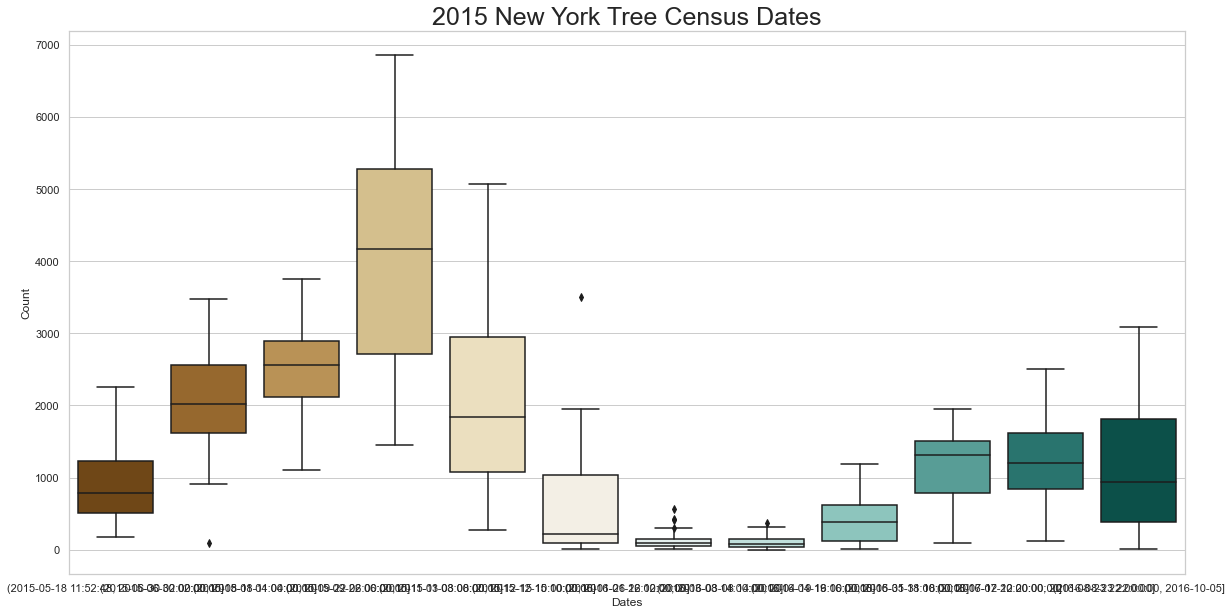

In [156]:
# Visualize

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Bin the table
dteTable['Bin'] = pd.cut(dteTable['Created_At'], 12)

# Plot
sns.boxplot(data = dteTable,
            x = 'Bin',
            y = 'Count',
            palette = 'BrBG')

# Customize
ax.set_xlabel('Dates')
ax.set_ylabel('Count')
plt.title('2015 New York Tree Census Dates',
         size = 25)

# Save fig
# plt.savefig("Stump & Tree Location By Conditions")

# Plot fig
plt.show()

# Additional Subset: Combined Features

In [102]:
# Subset with tree status, health, and date of creation 

subsetFeats1 = treeSubset[['Tree_Id',
                        'Created_At',
                        'Spc_Latin',
                        'Curb_Loc',
                        'Status',
                        'Health']].copy()
subsetFeats1.head()

,Tree_Id,Created_At,Spc_Latin,Curb_Loc,Status,Health
0,180683,2015-08-27,Acer rubrum,OnCurb,Alive,Fair
1,200540,2015-09-03,Quercus palustris,OnCurb,Alive,Fair
2,204026,2015-09-05,Gleditsia triacanthos var. inermis,OnCurb,Alive,Good
3,204337,2015-09-05,Gleditsia triacanthos var. inermis,OnCurb,Alive,Good
4,189565,2015-08-30,Tilia americana,OnCurb,Alive,Good


### Add Columns: Month, Day, Year

In [103]:
# Filter the intake subset table
# intake Subset cols: Tree_Id / Created_At, Spc_Latin, Curb_Loc, Status, Health

subsetFeats1 = subset(subsetFeats1)
subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count
0,2015-05-19,Acer,OnCurb,Alive,Fair,4
1,2015-05-19,Acer campestre,OnCurb,Alive,Poor,1
2,2015-05-19,Acer platanoides,OnCurb,Alive,Fair,6
3,2015-05-19,Acer platanoides,OnCurb,Alive,Good,4
4,2015-05-19,Acer platanoides,OnCurb,Alive,Poor,1


In [104]:
# Add a month col to store months from Created_At

subsetFeats1['Month'] = pd.to_datetime(subsetFeats1['Created_At']).dt.month
subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month
0,2015-05-19,Acer,OnCurb,Alive,Fair,4,5
1,2015-05-19,Acer campestre,OnCurb,Alive,Poor,1,5
2,2015-05-19,Acer platanoides,OnCurb,Alive,Fair,6,5
3,2015-05-19,Acer platanoides,OnCurb,Alive,Good,4,5
4,2015-05-19,Acer platanoides,OnCurb,Alive,Poor,1,5


In [105]:
# Add a day col to store days from Created_At

subsetFeats1['Day'] = pd.to_datetime(subsetFeats1['Created_At']).dt.day
subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month,Day
0,2015-05-19,Acer,OnCurb,Alive,Fair,4,5,19
1,2015-05-19,Acer campestre,OnCurb,Alive,Poor,1,5,19
2,2015-05-19,Acer platanoides,OnCurb,Alive,Fair,6,5,19
3,2015-05-19,Acer platanoides,OnCurb,Alive,Good,4,5,19
4,2015-05-19,Acer platanoides,OnCurb,Alive,Poor,1,5,19


In [106]:
# Add a year col to store years from Created_At

subsetFeats1['Year'] = pd.to_datetime(subsetFeats1['Created_At']).dt.year
subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month,Day,Year
0,2015-05-19,Acer,OnCurb,Alive,Fair,4,5,19,2015
1,2015-05-19,Acer campestre,OnCurb,Alive,Poor,1,5,19,2015
2,2015-05-19,Acer platanoides,OnCurb,Alive,Fair,6,5,19,2015
3,2015-05-19,Acer platanoides,OnCurb,Alive,Good,4,5,19,2015
4,2015-05-19,Acer platanoides,OnCurb,Alive,Poor,1,5,19,2015


In [107]:
# Create a month dictionary to use with month column

monthDict = {1: 'jan',
             2: 'feb',
             3: 'mar',
             4: 'apr',
             5: 'may',
             6: 'jun',
             7: 'jul',
             8: 'aug',
             9: 'sep',
             10: 'oct',
             11: 'nov',
             12: 'dec'}

# map to month col

subsetFeats1['Month'] = subsetFeats1['Month'].map(monthDict)

In [108]:
# Day dictionary to use with day column

dayDict = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th', 5: '5th', 6: '6th', 7: '7th', 8: '8th', 9: '9th', 10: '10th',
           11: '11th', 12: '12th', 13: '13th', 14: '14th', 15: '15th', 16: '16th', 17: '17th', 18: '18th',
           19: '19th', 20: '20th', 21: '21st', 22: '22nd', 23: '23rd', 24: '24th', 25: '25th', 26: '26th',
           27: '27th', 28: '28th', 29: '29th', 30: '30th', 31: '31st', 32: '32nd'}

# map to day col

subsetFeats1['Day'] = subsetFeats1['Day'].map(dayDict)

In [109]:
# Year dictionary for year column
# Dataset has only has yrs 2015, 2016

yearDict = {2015: '2015', 2016: '2016'}

# map to yr col

subsetFeats1['Year'] = subsetFeats1['Year'].map(yearDict)

In [110]:
# Calculate a mean column of the counts per month/day/yr

monthlyMean = subsetFeats1.groupby('Month')['Count'].mean()
subsetFeats1['Mean_mth'] = subsetFeats1['Month'].map(monthlyMean)

dailyMean = subsetFeats1.groupby('Day')['Count'].mean()
subsetFeats1['Mean_day'] = subsetFeats1['Day'].map(dailyMean)

yearlyMean = subsetFeats1.groupby('Year')['Count'].mean()
subsetFeats1['Mean_yr'] = subsetFeats1['Year'].map(yearlyMean)

subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month,Day,Year,Mean_mth,Mean_day,Mean_yr
0,2015-05-19,Acer,OnCurb,Alive,Fair,4,may,19th,2015,6.622854,12.239766,13.449609
1,2015-05-19,Acer campestre,OnCurb,Alive,Poor,1,may,19th,2015,6.622854,12.239766,13.449609
2,2015-05-19,Acer platanoides,OnCurb,Alive,Fair,6,may,19th,2015,6.622854,12.239766,13.449609
3,2015-05-19,Acer platanoides,OnCurb,Alive,Good,4,may,19th,2015,6.622854,12.239766,13.449609
4,2015-05-19,Acer platanoides,OnCurb,Alive,Poor,1,may,19th,2015,6.622854,12.239766,13.449609


# Features: `Curb Location`

#### Qstn: Where on a sidewalk are the most common trees?

In [124]:
# Filter for curb location
# intake Subset cols: Spc_Latin / Spc_Latin, Curb_Loc, Status, Health

curbLocation = subset(subsetFeats1)
curbLocation

,Spc_Latin,Curb_Loc,Status,Health,Count
0,Acer,OffsetFromCurb,Alive,Fair,24
1,Acer,OffsetFromCurb,Alive,Good,45
2,Acer,OffsetFromCurb,Alive,Poor,5
3,Acer,OnCurb,Alive,Fair,259
4,Acer,OnCurb,Alive,Good,329
...,...,...,...,...,...
714,Zelkova serrata,OffsetFromCurb,Alive,Good,168
715,Zelkova serrata,OffsetFromCurb,Alive,Poor,18
716,Zelkova serrata,OnCurb,Alive,Fair,339
717,Zelkova serrata,OnCurb,Alive,Good,433


In [125]:
# Melt curb table

curbs = curbLocation.melt(id_vars = ['Spc_Latin',
                                     'Curb_Loc',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
curbs.head()

,Spc_Latin,Curb_Loc,Count,Type,Condition
0,Acer,OffsetFromCurb,24,Status,Alive
1,Acer,OffsetFromCurb,45,Status,Alive
2,Acer,OffsetFromCurb,5,Status,Alive
3,Acer,OnCurb,259,Status,Alive
4,Acer,OnCurb,329,Status,Alive


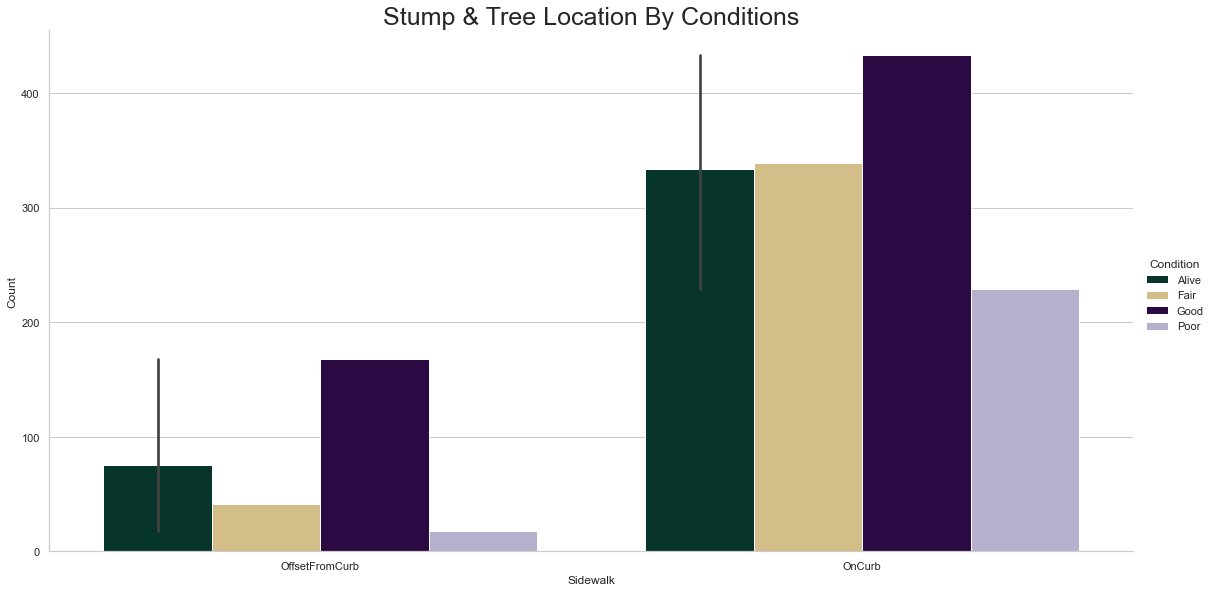

In [127]:
# Visualise sidewalk relation to Conditions


# Plot
sidewalkLocation = sns.catplot(data = curbs[curbs['Spc_Latin'] == max(curbs['Spc_Latin'])],
                               x = 'Curb_Loc',
                               y = 'Count',
                               hue = 'Condition',
                               palette = ['#003c30',
                                          '#dfc27d',
                                          '#2d004b',
                                          '#b2abd2',
                                          '#35978f',
                                          '#ffffbf',
                                          '#4d4d4d'],
                               kind = "bar",
                               height = 8,
                               aspect = 2
)


# Customize fig
sidewalkLocation.set_axis_labels('Sidewalk', 'Count')
plt.title('Stump & Tree Location By Conditions',
         size = 25)

# Save fig     
# plt.savefig("Stump & Tree Location By Conditions")

# Plot fig
plt.show()

# Feature: `Species`

#### Qst: What are the most common trees? 

In [114]:
speciesTable = subsetFeats1['Spc_Latin'].value_counts()
pd.DataFrame(speciesTable).head()

,Spc_Latin
Platanus x acerifolia,1689
Quercus palustris,1572
Acer platanoides,1550
Gleditsia triacanthos var. inermis,1525
Pyrus calleryana,1449


In [115]:
# Filter for species name & condition
# intakeSubset cols: Spc_Latin / Spc_Latin, Status, Health

nameTable = subset(subsetFeats1)
nameTable.head()

,Spc_Latin,Status,Health,Count
0,Acer,Alive,Fair,283
1,Acer,Alive,Good,374
2,Acer,Alive,Poor,178
3,Acer buergerianum,Alive,Fair,16
4,Acer buergerianum,Alive,Good,40


In [116]:
# Melt species name

species = nameTable.melt(id_vars = ['Spc_Latin',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
species.head()

,Spc_Latin,Count,Type,Condition
0,Acer,283,Status,Alive
1,Acer,374,Status,Alive
2,Acer,178,Status,Alive
3,Acer buergerianum,16,Status,Alive
4,Acer buergerianum,40,Status,Alive


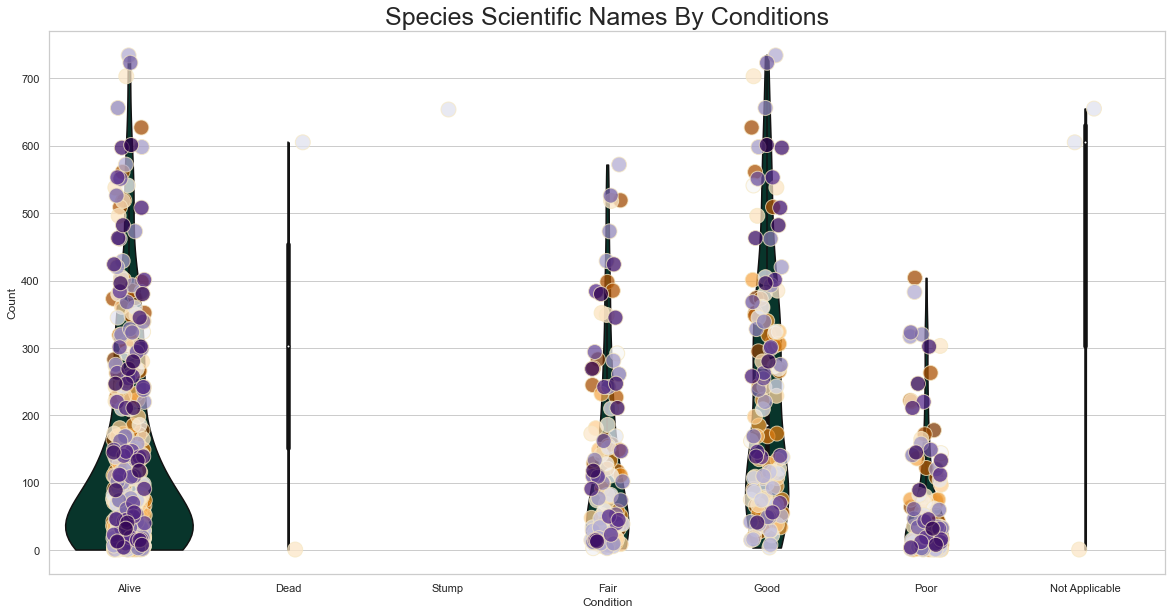

In [117]:
# Visualise species names in relation to Conditions


# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot
ax = sns.violinplot(data = species, 
                  x = 'Condition', 
                  y = 'Count',
                  color = '#003c30',
                  scale = 'count', # 'area' / -->'count' / 'width'
                  cut = 0
)

ax = sns.stripplot(data = species, 
              x = 'Condition', 
              y = 'Count', 
              hue = 'Spc_Latin',
              size = 15,
              palette = 'PuOr',
              edgecolor = '#f6e8c3',
              linewidth = 1,
              jitter = True, 
              alpha = .75
)

# Customize fig
ax.set_xlabel('Condition')
ax.set_ylabel('Count')
plt.title('Species Scientific Names By Conditions',
           size = 25)
ax.get_legend().remove()

# Save fig     
# plt.savefig("Species Scientific Names By Conditions")

# Plot fig
plt.show()

# Feature: `Created At` - month, day, year

#### Qst: Which month had the most records?

In [120]:
# Evaluate created_at column (top 15)

dateTable = subsetFeats1['Created_At'].value_counts()
pd.DataFrame(dateTable).head(15).transpose()

,2015-10-13,2015-10-26,2015-11-03,2015-11-02,2015-10-27,2015-11-04,2015-10-30,2015-10-14,2015-10-20,2015-08-29,2015-10-29,2015-10-15,2015-07-29,2015-10-22,2015-11-05
Created_At,303,289,288,287,284,284,283,280,277,267,266,262,261,261,258


In [121]:
# Filter for dates & conditions
# intakeSubset cols: Created_At / Month, Day, Year, Status, Health

datesConditions = subset(subsetFeats1)
datesConditions.head()

,Month,Day,Year,Status,Health,Count
0,apr,10th,2016,Alive,Good,7
1,apr,10th,2016,Stump,Not Applicable,1
2,apr,11th,2016,Alive,Fair,11
3,apr,11th,2016,Alive,Good,23
4,apr,11th,2016,Alive,Poor,5


In [122]:
# Melt date & conditions

datesConditions = datesConditions.melt(id_vars = ['Month',
                                              'Day',
                                              'Year',
                                              'Count'],
                               value_vars = ['Status',
                                             'Health'],
                               var_name = "Type",
                               value_name = "Condition")
datesConditions.head()

,Month,Day,Year,Count,Type,Condition
0,apr,10th,2016,7,Status,Alive
1,apr,10th,2016,1,Status,Stump
2,apr,11th,2016,11,Status,Alive
3,apr,11th,2016,23,Status,Alive
4,apr,11th,2016,5,Status,Alive


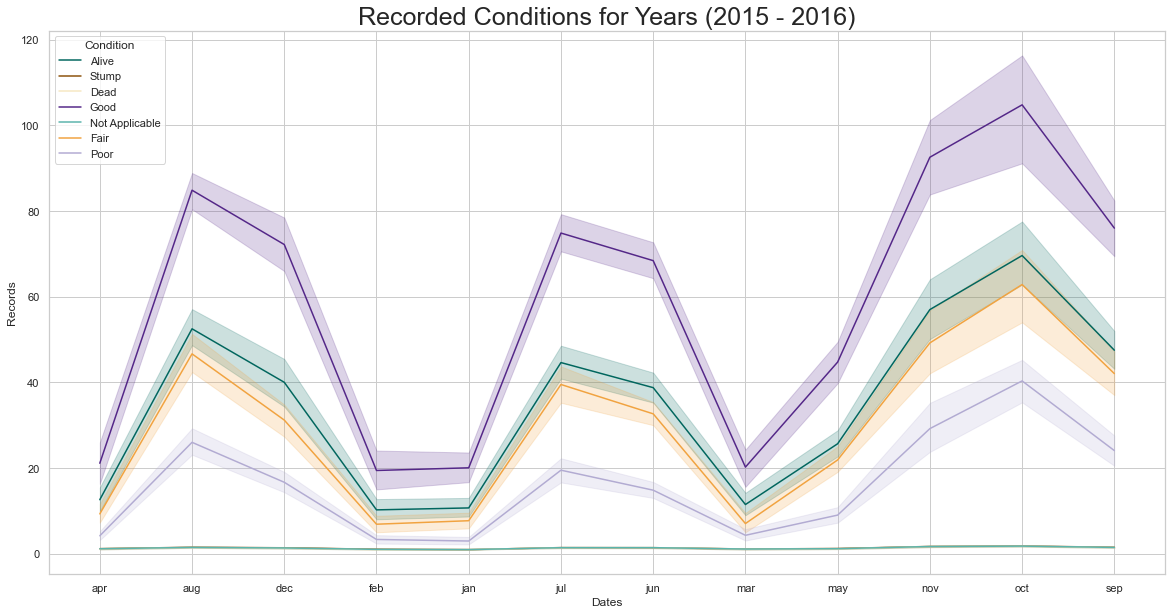

In [129]:
# Visualise when conditions were recorded

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot
sns.lineplot(data = datesConditions,
             x = 'Month',
             y = 'Count',
             hue = 'Condition',
             palette = ['#01665e',
                        '#8c510a',
                        '#f6e8c3',
                        '#542788',
                        '#5ab4ac',
                        '#f1a340',
                        '#b2abd2'])
             

# Customize fig
ax.set_xlabel('Dates')
ax.set_ylabel('Records')
plt.title('Recorded Conditions for Years (2015 - 2016)',
           size = 25)


# Save fig     
# plt.savefig("Recorded Conditions for Two Years")

# Plot fig
plt.show()

# Features: `Curb Location` - `Status` & `Health` by `Conditions`

#### Qst: What side of NY street sidewalks had the most recorded conditions?

In [130]:
# Filter for dates & curb location
# intakeSubset cols: Created_At / Curb_Loc, Month, Day, Year, Status, Health

datesSidewalk = subset(subsetFeats1)
datesSidewalk.head()

,Curb_Loc,Month,Day,Year,Status,Health,Count
0,OffsetFromCurb,apr,11th,2016,Alive,Fair,1
1,OffsetFromCurb,apr,11th,2016,Alive,Good,4
2,OffsetFromCurb,apr,11th,2016,Alive,Poor,1
3,OffsetFromCurb,apr,16th,2016,Alive,Good,1
4,OffsetFromCurb,apr,18th,2016,Alive,Fair,2


In [133]:
# Melt date & curb locations

datesSidewalk = datesSidewalk.melt(id_vars = ['Month',
                                             'Day',
                                             'Year',
                                             'Curb_Loc',
                                             'Count'],
                               value_vars = ['Status',
                                             'Health'],
                               var_name = "Type",
                               value_name = "Condition")
datesSidewalk.head()

,Month,Day,Year,Curb_Loc,Count,Type,Condition
0,apr,11th,2016,OffsetFromCurb,1,Status,Alive
1,apr,11th,2016,OffsetFromCurb,4,Status,Alive
2,apr,11th,2016,OffsetFromCurb,1,Status,Alive
3,apr,16th,2016,OffsetFromCurb,1,Status,Alive
4,apr,18th,2016,OffsetFromCurb,2,Status,Alive


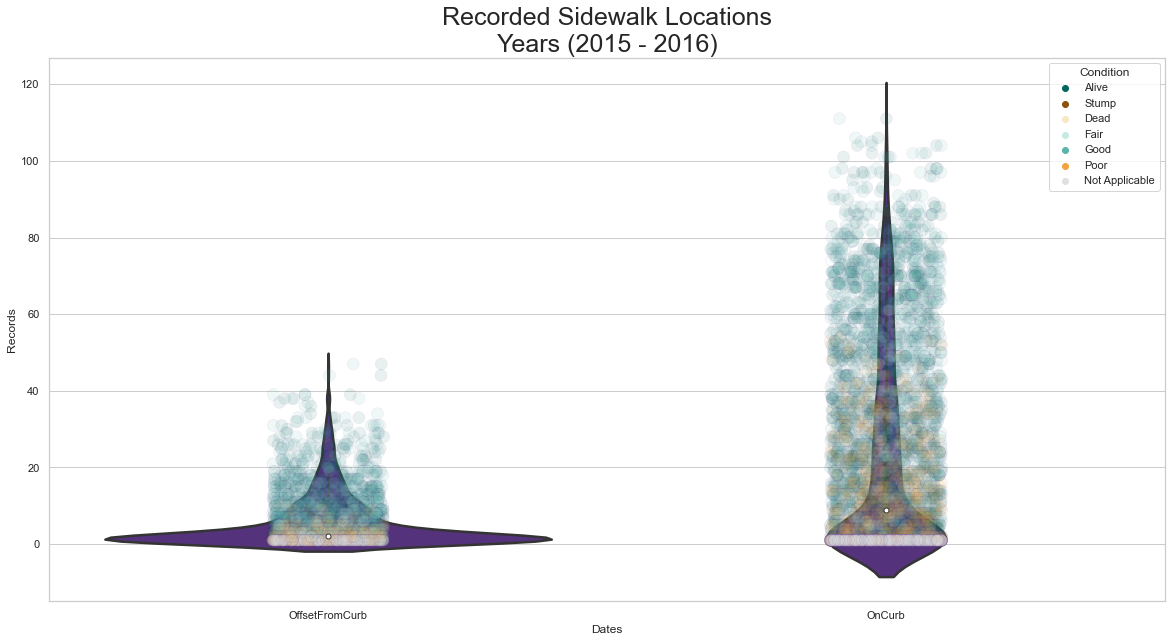

In [141]:
# Visualise recorded curb locations

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot
sns.stripplot(data = datesSidewalk,
             x = 'Curb_Loc',
             y = 'Count',
             hue = 'Condition',
             palette = ['#01665e',
                        '#8c510a',
                        '#f6e8c3',
                        '#c7eae5',
                        '#5ab4ac',
                        '#f1a340',
                        '#e0e0e0'],
             edgecolor = '#542788',
             linewidth = 0.5,
             alpha = 0.09,
             jitter = True,
             size = 12)

sns.violinplot(data = datesSidewalk,
             x = 'Curb_Loc',
             y = 'Count',
             linewidth = 2.5,
             color = '#542788')
             

# Customize fig
ax.set_xlabel('Dates')
ax.set_ylabel('Records')
plt.title('Recorded Sidewalk Locations\nYears (2015 - 2016)',
           size = 25)


# Save fig     
# plt.savefig("Recorded Conditions for Two Years")

# Plot fig
plt.show()

# Feature: `Steward`

#### Qst: What are the recorded amounts for visible tree & stump care?

In [146]:
# Filter for stewardship & scientific names
# treeSubset cols: Tree_Id / Steward

stewardship = subset(treeSubset)
stewardship

,Steward,Count
0,1or2,143557
1,3or4,19183
2,4orMore,1610
3,None,487823
4,Not Applicable,31615


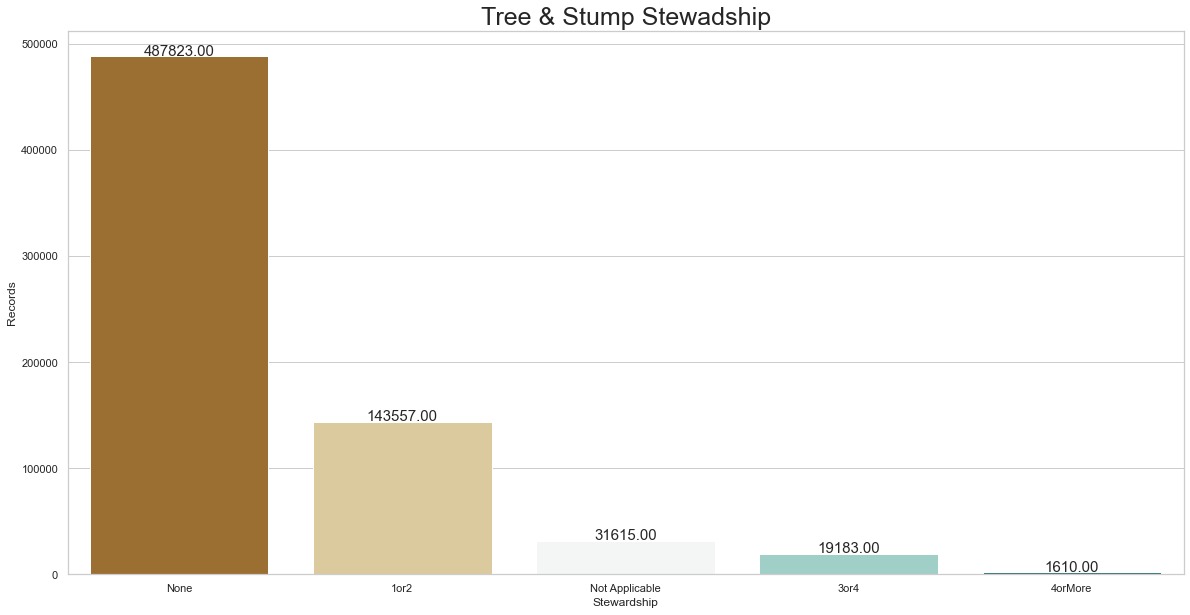

In [155]:
# Visualise scientific names recorded

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot
stwdPlot = sns.barplot(data = stewardship.sort_values('Count',
                                                      ascending = False),
                       x = 'Steward',
                       y = 'Count',
                       palette = 'BrBG')

# Annotate
for bar in stwdPlot.patches:
    stwdPlot.annotate(format(bar.get_height(), '.2f'),
                            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                             ha = 'center',
                             va = 'center',
                             size = 15,
                             xytext = (0, 5),
                             textcoords = 'offset points')
             

# Customize fig
ax.set_xlabel('Stewardship')
ax.set_ylabel('Records')
plt.title('Tree & Stump Stewadship',
           size = 25)


# Save fig     
# plt.savefig("Recorded Species Scientific Names")

# Plot fig
plt.show()